### IMPORT DEPENDENCIES

In [1]:
from fastbook import *

### Load and prepare Data

In [3]:
path = Path("C:/Users/Dickson/healthy_or_not")

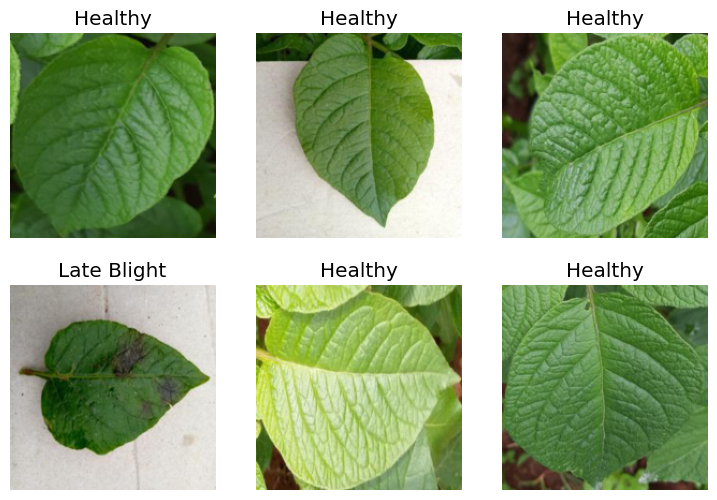

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

### Create and Train the Model

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.098992,0.307990,0.127907,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.491318,0.431054,0.174419,01:05
1,0.355521,0.315537,0.127907,01:03
2,0.264145,0.208281,0.081395,01:04
3,0.202420,0.097643,0.069767,01:11
4,0.159387,0.038486,0.000000,01:00


### Evaluate the Model

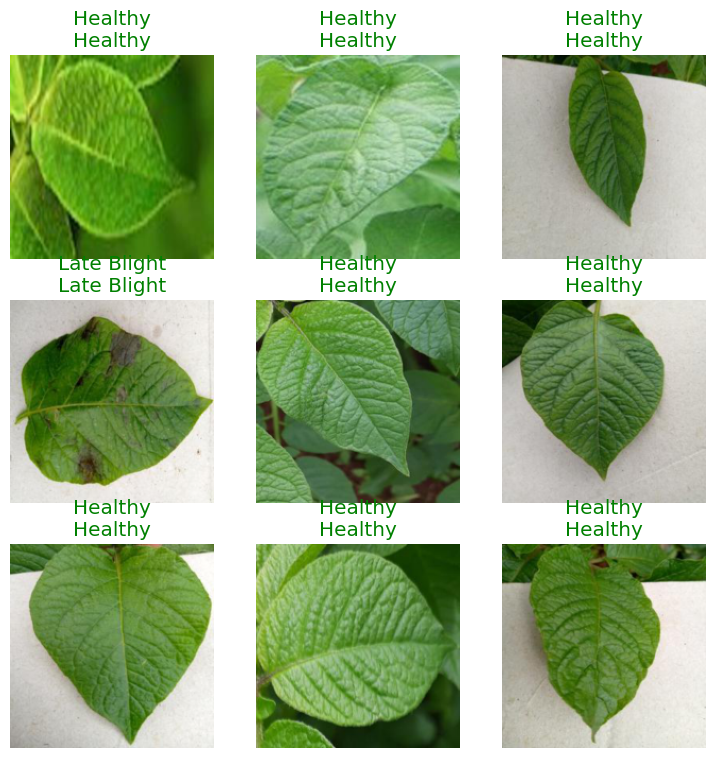

In [10]:
learn.show_results()

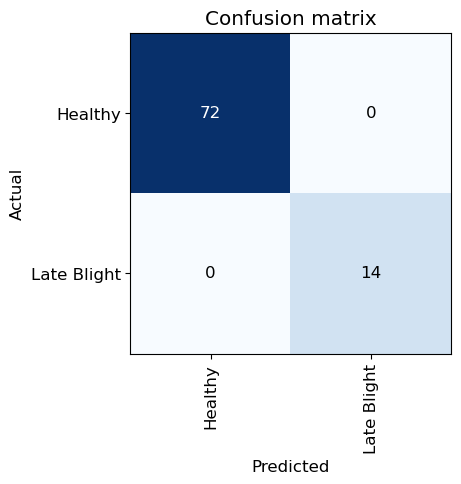

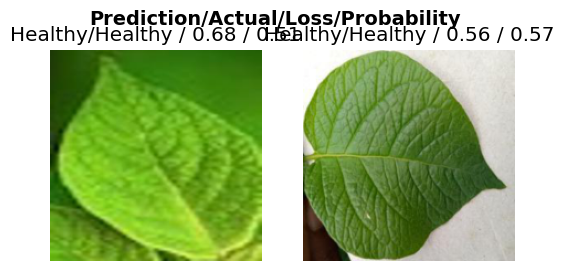

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(2, nrows=1)

### Make Predictions

In [11]:
is_healthy,_,probs = learn.predict(PILImage.create(r"C:\Users\Dickson\healthy_or_not\Late Blight\Late_Blight (452).jpg"))
print(f"This is : {is_healthy}.")
print(f"Probability it's healthy: {probs[0]:.4f} ")

This is : Late Blight.
Probability it's healthy: 0.0000 
